# Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('dataframe_2.pkl')

In [3]:
df.head()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate,close_elect
0,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,93.371913,0.762305,0.025512,0
1,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,133.746808,0.810999,0.040973,0
2,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,28.557545,0.491888,0.045390,0
3,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,36.409779,0.766278,0.022146,0
4,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,89.973324,0.949322,0.086808,0


In [4]:
# drop rows with nans

df = df.dropna()

In [5]:
# inspect mean values of features for not-close vs close outcomes

df.groupby('close_elect').mean()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate
close_elect,,,,,,,,,,,,,
0,97754.622861,0.673854,35383.793292,41.180151,40647.942847,49173.193018,4.611328,15.914203,85.657392,20.269884,251.164202,0.838362,0.088684
1,213686.159236,2.568153,77334.891720,38.888535,42207.388535,53773.019108,4.530573,15.549045,88.495541,27.620382,317.779807,0.760183,0.095176


## Model Preprocessing
- Calculate null accuracy
- Define feature matrix and response vector
- Split data into test/train
- Scale feature (X) matricies

In [6]:
# baseline, null model accuracy - guess '0' every time

(df['close_elect'] == 0).sum() / len(df)

0.9490094186424164

## Model Preprocessing

In [14]:
# test/train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# smote to increase underrepresented sampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [16]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_res)

# transform train data
X_train_trans = scaler.transform(X_res)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

# model input
X_train_mod = X_train_trans
y_train_mod = y_res

X_test_mod = X_test_trans
y_test_mod = y_test

# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# transform train data
X_train_trans = scaler.transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

# model input
X_train_mod = X_train_trans
y_train_mod = y_train

X_test_mod = X_test_trans
y_test_mod = y_test

In [17]:
from sklearn import metrics

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [19]:
# search for an optimal value of K for KNN

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_mod, y_train_mod)
y_pred = knn.predict(X_test_mod)

In [20]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.72      0.83       876
          1       0.13      0.73      0.21        48

avg / total       0.94      0.72      0.80       924



In [21]:
metrics.confusion_matrix(y_test, y_pred)

array([[633, 243],
       [ 13,  35]])

In [25]:
from sklearn import model_selection

In [43]:
knn_proba = knn.predict_proba(X_test_mod)[:, 1]

In [44]:
from sklearn.metrics import precision_recall_curve

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_test_mod, knn_proba)

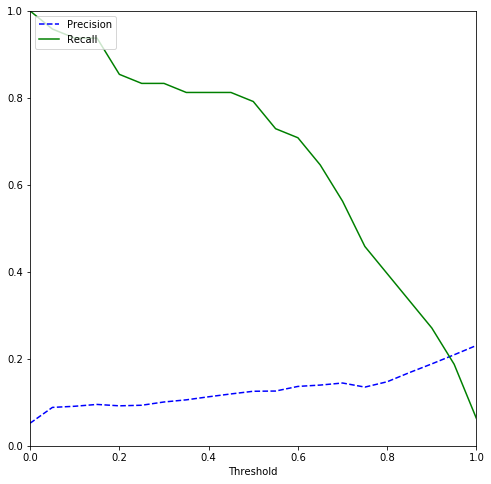

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.xlim([0,1])
        
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [83]:
y_prob_knn = knn.predict_proba(X_test_mod)[:,1]

In [44]:
from sklearn.model_selection import GridSearchCV

In [84]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall')
grid.fit(X_train_mod, y_train_mod)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_mod, y_train_mod)
y_pred = knn.predict(X_test_mod)

In [ ]:
print(metrics.classification_report(y_test_mod, y_pred))